In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [192]:
pd.set_option('display.max_columns', None)

In [193]:
df = pd.read_csv('gurgaon_properties_cleaned_v2.csv').drop_duplicates()

In [194]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,international city by sobha phase 2,sector 109,8.75,24306.0,3600.0,Plot area 400(334.45 sq.m.),5,5,3+,3.0,North-East,New Property,NaN,NaN,NaN,1,1,1,1,0,2,153
1,house,eldeco mansionz,sector 48,6.40,23704.0,2700.0,Plot area 365(305.19 sq.m.)Built Up area: 366 ...,4,4,3,3.0,West,Moderately Old,NaN,366.00,NaN,0,1,1,0,0,2,151
2,flats,bestech park view city,sector 49,2.90,12169.0,2383.0,Super Built up area 2383(221.39 sq.m.),4,4,3+,5.0,South-West,Moderately Old,2383.0,NaN,NaN,0,1,0,0,0,0,117
3,flats,denso haryana housing society,manesar,0.90,4308.0,2089.0,Carpet area: 2089 (194.07 sq.m.),3,3,3+,5.0,East,Moderately Old,NaN,NaN,2089.0,0,1,0,0,0,0,7
4,flats,experion windchants,sector 112,3.40,12134.0,2802.0,Super Built up area 2802(260.31 sq.m.)Built Up...,3,3,2,14.0,North-East,Relatively New,2802.0,2225.56,NaN,0,0,0,0,0,2,159


In [195]:
df.shape

(3679, 23)

In [196]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

/var/folders/kw/6wv56dfd1g90mmjkfvrm90ww0000gn/T/ipykernel_28736/2797181776.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

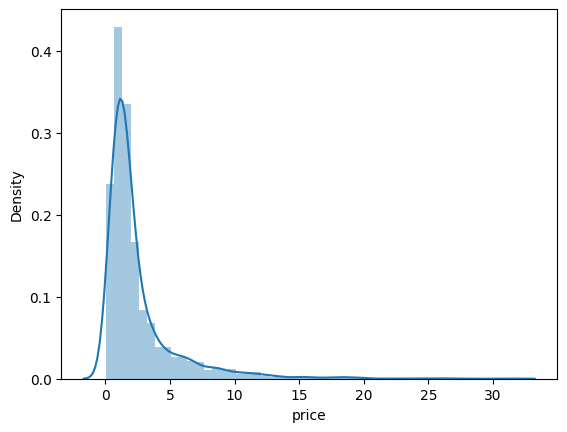

In [197]:
# outliers on the basis of price column
sns.distplot(df['price'])

<Axes: xlabel='price'>

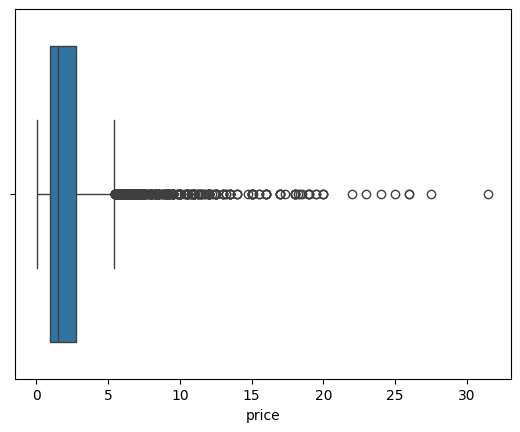

In [198]:
sns.boxplot(x=df['price'])

In [199]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(425,
 count    425.000000
 mean       9.235624
 std        4.065259
 min        5.460000
 25%        6.460000
 50%        8.000000
 75%       10.750000
 max       31.500000
 Name: price, dtype: float64)

In [200]:
outliers.sort_values('price',ascending=False).head(20)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
174,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,3.0,North-East,Moderately Old,NaN,NaN,NaN,1,1,1,1,0,1,74
3365,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,NaN,NaN,1,1,0,1,1,2,42
614,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,NaN,NaN,1,1,0,1,1,2,138
2504,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,2,72
3436,house,suncity township,sector 54,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,North,Moderately Old,NaN,NaN,NaN,1,1,1,1,0,0,0
2588,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,NaN,NaN,1,1,0,1,0,2,122
1124,house,independent,sector 26,23.00,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,South-West,Relatively New,NaN,NaN,NaN,1,1,1,1,0,2,145
1533,house,vipul tatvam villa,sector 48,22.00,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5,6,3,3.0,NaN,Moderately Old,NaN,NaN,NaN,0,1,0,0,0,0,54
585,house,independent,sector 26,20.00,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,3.0,West,Relatively New,NaN,NaN,NaN,0,1,0,1,0,1,97
3354,house,luxury dlf city floors,sector 26,20.00,48889.0,4091.0,Plot area 500(418.06 sq.m.),16,16,3+,4.0,NaN,New Property,NaN,NaN,NaN,0,1,0,0,0,2,31


In [201]:
# on the basis of price col we can say that there are some genuine outliers but there are some data erros as well

# Price_per_sqft

/var/folders/kw/6wv56dfd1g90mmjkfvrm90ww0000gn/T/ipykernel_28736/2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

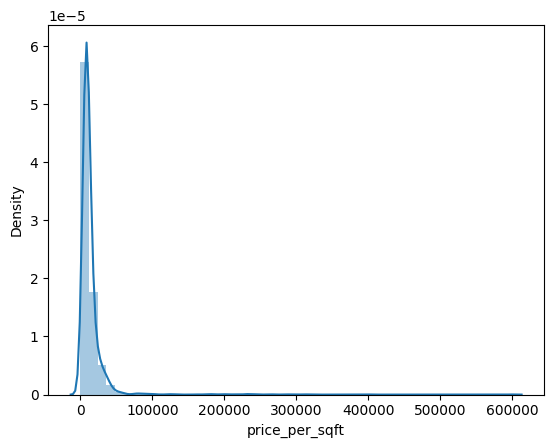

In [202]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

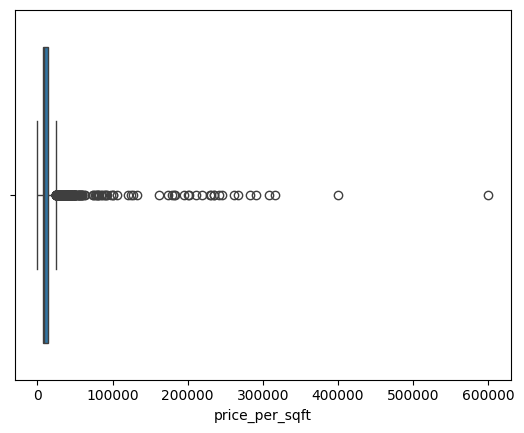

In [203]:
sns.boxplot(x=df['price_per_sqft'])

In [204]:
# Calculate the IQR for the 'price' column
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(354,
 count       354.000000
 mean      52592.612994
 std       61150.458507
 min       24489.000000
 25%       28208.250000
 50%       33368.500000
 75%       41982.250000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [205]:
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)

/var/folders/kw/6wv56dfd1g90mmjkfvrm90ww0000gn/T/ipykernel_28736/205471443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)


In [206]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])

/var/folders/kw/6wv56dfd1g90mmjkfvrm90ww0000gn/T/ipykernel_28736/3686006548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])


In [207]:
outliers_sqft['price_per_sqft'].describe()

count      354.000000
mean     29357.906780
std      12403.077309
min       2723.000000
25%      25562.000000
50%      29870.500000
75%      35549.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [208]:
df.update(outliers_sqft)

/var/folders/kw/6wv56dfd1g90mmjkfvrm90ww0000gn/T/ipykernel_28736/2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

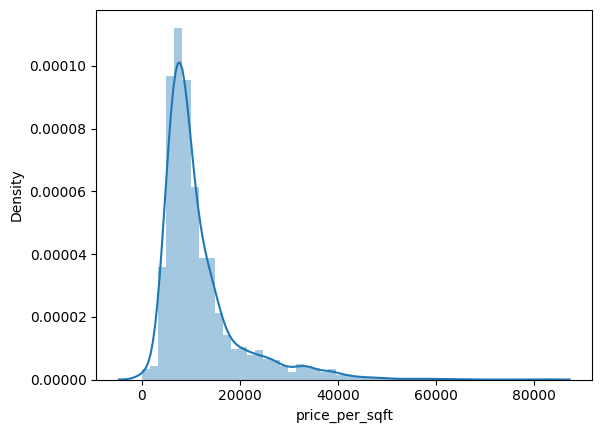

In [209]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

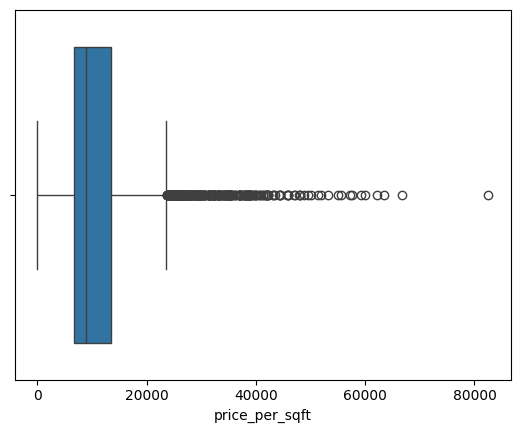

In [210]:
sns.boxplot(x=df['price_per_sqft'])

In [211]:
df[df['price_per_sqft']>50000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
213,house,emaar the palm springs,sector 54,14.00,62222.0,2250.0,Plot area 250(209.03 sq.m.),4,5,3+,2.0,North,Old Property,NaN,NaN,NaN,1,1,0,0,0,2,160
226,house,independent,sector 26,14.75,51864.0,2844.0,Plot area 316(264.22 sq.m.),16,20,3+,4.0,East,New Property,NaN,NaN,NaN,1,1,1,1,0,2,153
401,house,independent,sector 25,16.00,59259.0,2700.0,Plot area 350(292.64 sq.m.)Built Up area: 325 ...,16,16,3+,4.0,West,New Property,NaN,325.0,300.0,1,1,1,1,0,2,72
614,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,NaN,NaN,1,1,0,1,1,2,138
629,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12,12,3+,4.0,North,New Property,NaN,1600.0,NaN,0,0,0,0,0,2,99
879,house,project housing board colony,sector 31,8.00,63492.0,1260.0,Built Up area: 140 (117.06 sq.m.),2,1,0,1.0,NaN,Undefined,NaN,140.0,NaN,0,0,0,0,0,0,0
1478,house,unitech escape,sector 50,10.80,60000.0,1800.0,Plot area 290(242.48 sq.m.)Built Up area: 250 ...,4,4,3,2.0,North,Relatively New,NaN,250.0,200.0,1,1,1,1,0,2,103
2467,flats,unitech vistas,sector 70,9.00,57508.0,1565.0,Built Up area: 1565 (145.39 sq.m.),3,3,0,7.0,NaN,Undefined,NaN,1565.0,NaN,0,0,0,0,0,0,0
2504,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,2,72
2588,house,emaar the palm springs,sector 54,24.00,66667.0,3600.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,NaN,NaN,1,1,0,1,0,2,122


In [212]:
df = df[df['price_per_sqft'] <= 50000]

<Axes: xlabel='price_per_sqft'>

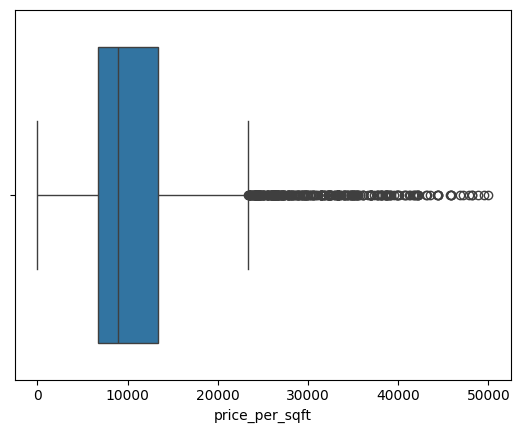

In [213]:
sns.boxplot(x=df['price_per_sqft'])

# Area

/var/folders/kw/6wv56dfd1g90mmjkfvrm90ww0000gn/T/ipykernel_28736/91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

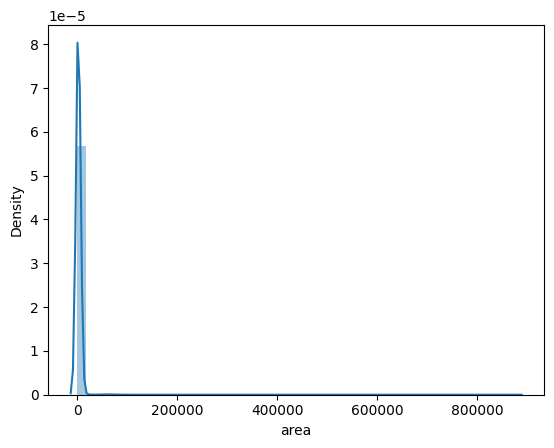

In [214]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

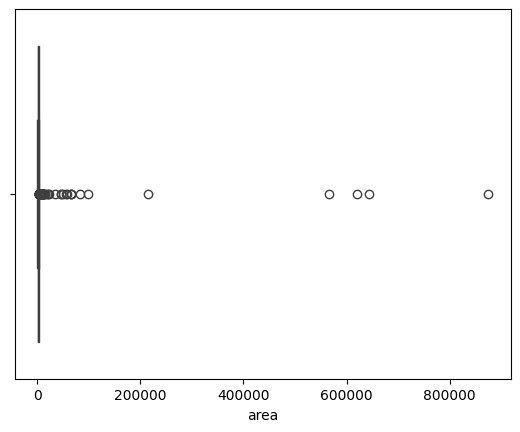

In [215]:
sns.boxplot(x=df['area'])

In [216]:
df['area'].describe()

count      3649.000000
mean       2946.754727
std       23201.868292
min         145.000000
25%        1261.000000
50%        1750.000000
75%        2350.000000
max      875000.000000
Name: area, dtype: float64

In [217]:
df[df['area'] > 100000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1254,flats,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2,2,2,2.0,South-West,New Property,NaN,NaN,569243.0,0,0,0,0,0,0,76
1401,flats,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2,2,1,1.0,North-East,Relatively New,NaN,NaN,607936.0,1,0,0,0,1,0,65
2241,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6,5,3+,2.0,NaN,New Property,NaN,NaN,NaN,1,1,0,1,1,2,0
2463,flats,hcbs sports ville,sector 33,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2,2,2,8.0,NaN,Relatively New,NaN,737147.0,NaN,0,0,0,0,0,1,44
3072,flats,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2,2,1,3.0,North,New Property,NaN,NaN,514396.0,0,0,0,0,0,0,44


In [218]:
df = df[df['area'] < 100000]

/var/folders/kw/6wv56dfd1g90mmjkfvrm90ww0000gn/T/ipykernel_28736/91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

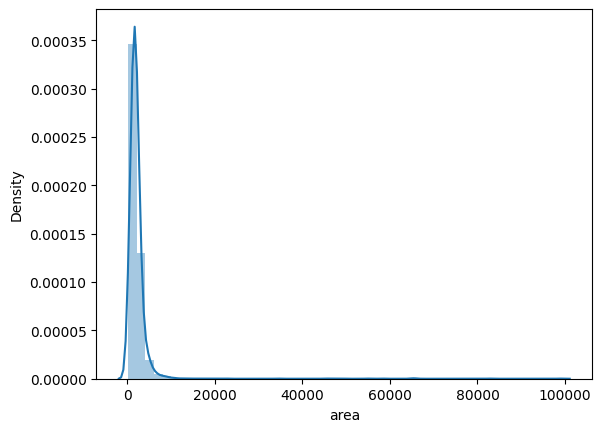

In [219]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

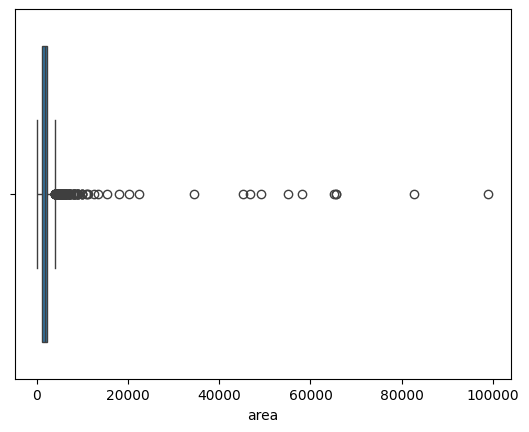

In [220]:
sns.boxplot(x=df['area'])

In [221]:
df[df['area'] > 10000].sort_values('area',ascending=False)

# 2851, 3572, 1207, 1122, 1883, 1220, 3260, 3492, 2785, 1730, 2532, 2232, 1057, 1838

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2327,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0,1,1,1,0,2,60
2851,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,NaN,NaN,0,0,0,0,1,0,7
3572,flats,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,64529.00,1,0,0,0,0,0,15
1207,flats,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12.0,North,Relatively New,NaN,NaN,64412.00,0,0,0,0,0,0,51
2640,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,0,0
1122,flats,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0,0,0,0,0,0,15
1883,flats,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0,0,0,0,0,0,37
1220,flats,signature the serenas,sector 33,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1,0,0,0,0,0,37
2964,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,2,109
3260,flats,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0,0,0,0,1,0,33


In [222]:
df.drop(index=[2851, 3572, 1207, 1122, 1883, 1220, 3260, 3492, 2785, 1730, 2532, 2232, 1057, 1838], inplace=True)

In [263]:
# df.loc[48,'area'] = 115*9
# df.loc[300,'area'] = 7250
# df.loc[2666,'area'] = 5800
# df.loc[1358,'area'] = 2660
# df.loc[3195,'area'] = 2850
# df.loc[2131,'area'] = 1812
# df.loc[3088,'area'] = 2160
# df.loc[3444,'area'] = 1175

df.loc[2327, 'area'] = 4518
df.loc[2640, 'area'] = 7250
df.loc[2964, 'area'] = 1935



/var/folders/kw/6wv56dfd1g90mmjkfvrm90ww0000gn/T/ipykernel_28736/91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

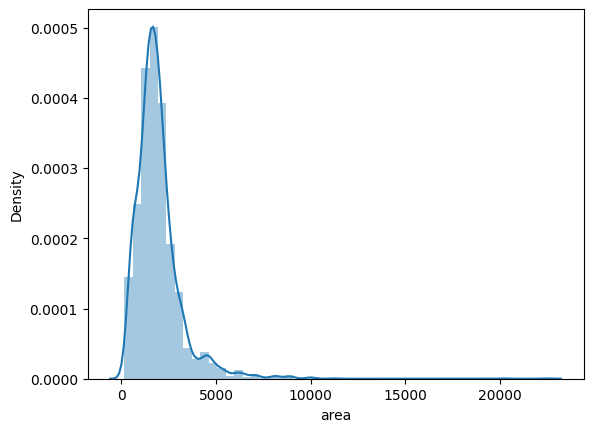

In [264]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

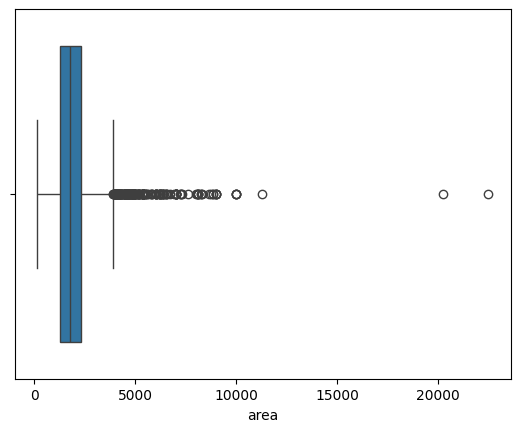

In [265]:
sns.boxplot(x=df['area'])

In [266]:
df['area'].describe()

count     3585.000000
mean      1948.810879
std       1279.950773
min        145.000000
25%       1258.000000
50%       1743.000000
75%       2310.000000
max      22498.000000
Name: area, dtype: float64

# Bedroom

/var/folders/kw/6wv56dfd1g90mmjkfvrm90ww0000gn/T/ipykernel_28736/1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

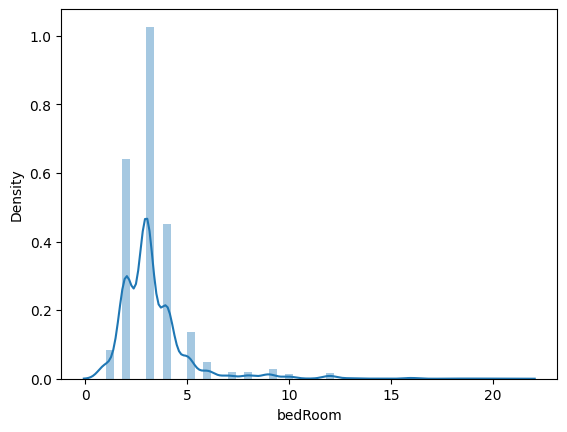

In [227]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

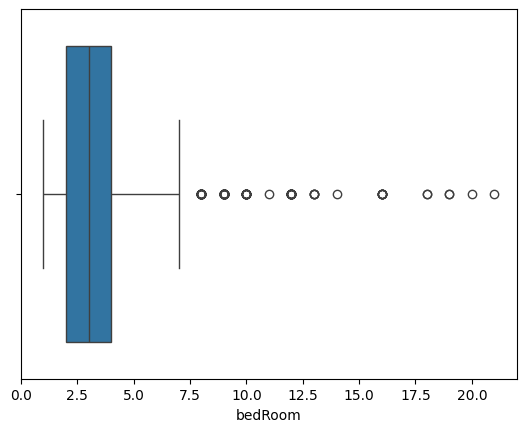

In [228]:
sns.boxplot(x=df['bedRoom'])

In [229]:
df['bedRoom'].describe()

count    3630.000000
mean        3.331956
std         1.828029
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [230]:
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1173,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21,21,3+,5.0,North,Relatively New,NaN,NaN,NaN,0,1,0,0,0,1,49
1895,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20,20,3+,4.0,East,Relatively New,NaN,NaN,NaN,0,1,0,0,0,1,22
1432,house,independent,sector 17a,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19,17,3+,5.0,North-West,Relatively New,NaN,7500.0,NaN,1,0,1,0,0,0,68
2942,house,independent,sector 17a,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19,17,3,4.0,North-West,Relatively New,NaN,1622.0,NaN,1,1,1,1,0,0,74
2681,house,private house,sector 55,7.05,46906.0,1503.0,Plot area 167(139.63 sq.m.),18,18,3+,4.0,North-East,Relatively New,NaN,NaN,NaN,0,0,0,0,1,1,57
1864,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18,18,3+,4.0,South-West,Relatively New,NaN,NaN,NaN,0,1,0,0,0,1,70
955,house,independent,sector 56,12.39,45889.0,2700.0,Plot area 300(250.84 sq.m.),16,18,3+,4.0,North-East,New Property,NaN,NaN,NaN,0,1,0,1,0,2,49
2185,house,independent,sector 40,12.00,38986.0,3078.0,Plot area 342(285.96 sq.m.),16,16,3+,4.0,NaN,New Property,NaN,NaN,NaN,1,1,1,1,0,2,0
1732,house,dlf city plots,sector 26,20.00,44267.0,4518.0,Plot area 502(419.74 sq.m.),16,20,3+,4.0,North-East,New Property,NaN,NaN,NaN,1,1,1,1,0,2,153
39,house,independent,sector 55,9.19,34037.0,2700.0,Plot area 300(250.84 sq.m.),16,18,2,4.0,West,New Property,NaN,NaN,NaN,0,1,0,1,0,2,49


In [231]:
df = df[df['bedRoom'] <= 10]

In [232]:
df.shape

(3585, 23)

/var/folders/kw/6wv56dfd1g90mmjkfvrm90ww0000gn/T/ipykernel_28736/1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

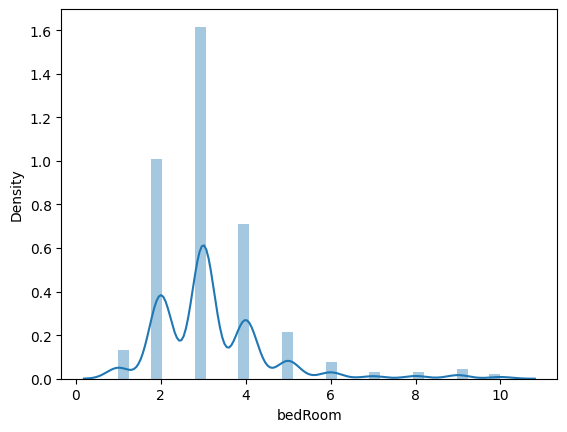

In [233]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

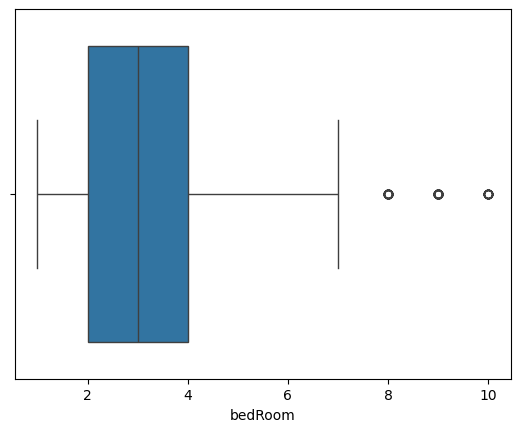

In [234]:
sns.boxplot(x=df['bedRoom'])

In [235]:
df['bedRoom'].describe()

count    3585.000000
mean        3.201953
std         1.390716
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

# Bathroom

/var/folders/kw/6wv56dfd1g90mmjkfvrm90ww0000gn/T/ipykernel_28736/2904465235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathroom'])


<Axes: xlabel='bathroom', ylabel='Density'>

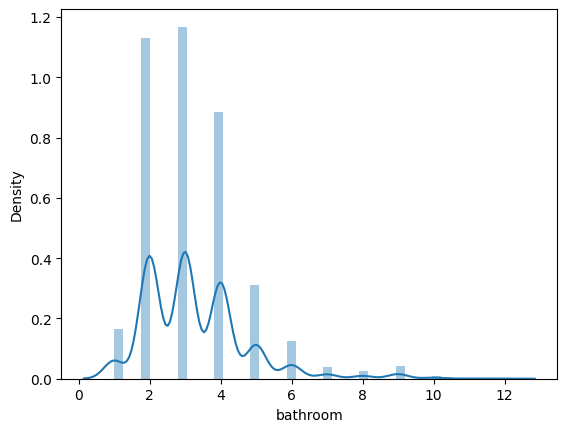

In [236]:
sns.distplot(df['bathroom'])

<Axes: xlabel='bathroom'>

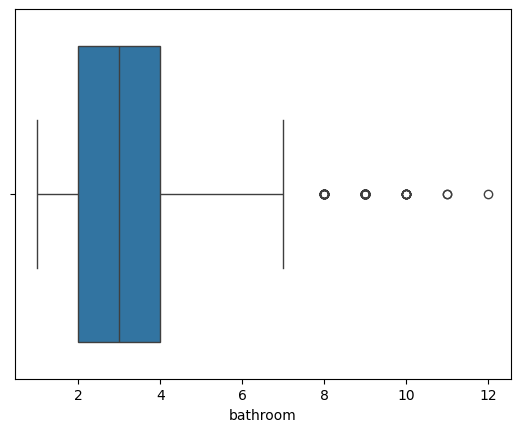

In [237]:
sns.boxplot(x=df['bathroom'])

In [238]:
df[df['bathroom'] > 10].sort_values('bathroom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
929,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9,12,3+,3.0,North-East,Relatively New,NaN,6390.0,NaN,0,1,0,0,0,2,146
1538,house,independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8,11,3+,3.0,East,Old Property,NaN,5000.0,NaN,1,1,0,1,1,2,39
3664,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10,11,3+,4.0,South-East,Relatively New,NaN,7000.0,NaN,0,0,0,1,0,2,38


In [239]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,international city by sobha phase 2,sector 109,8.75,24306.0,3600.0,Plot area 400(334.45 sq.m.),5,5,3+,3.0,North-East,New Property,NaN,NaN,NaN,1,1,1,1,0,2,153
1,house,eldeco mansionz,sector 48,6.40,23704.0,2700.0,Plot area 365(305.19 sq.m.)Built Up area: 366 ...,4,4,3,3.0,West,Moderately Old,NaN,366.00,NaN,0,1,1,0,0,2,151
2,flats,bestech park view city,sector 49,2.90,12169.0,2383.0,Super Built up area 2383(221.39 sq.m.),4,4,3+,5.0,South-West,Moderately Old,2383.0,NaN,NaN,0,1,0,0,0,0,117
3,flats,denso haryana housing society,manesar,0.90,4308.0,2089.0,Carpet area: 2089 (194.07 sq.m.),3,3,3+,5.0,East,Moderately Old,NaN,NaN,2089.0,0,1,0,0,0,0,7
4,flats,experion windchants,sector 112,3.40,12134.0,2802.0,Super Built up area 2802(260.31 sq.m.)Built Up...,3,3,2,14.0,North-East,Relatively New,2802.0,2225.56,NaN,0,0,0,0,0,2,159


# super built up area

/var/folders/kw/6wv56dfd1g90mmjkfvrm90ww0000gn/T/ipykernel_28736/4184943455.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])


<Axes: xlabel='super_built_up_area', ylabel='Density'>

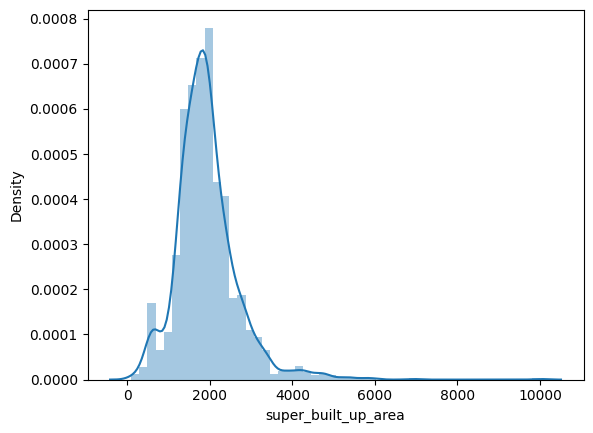

In [240]:
sns.distplot(df['super_built_up_area'])

<Axes: xlabel='super_built_up_area'>

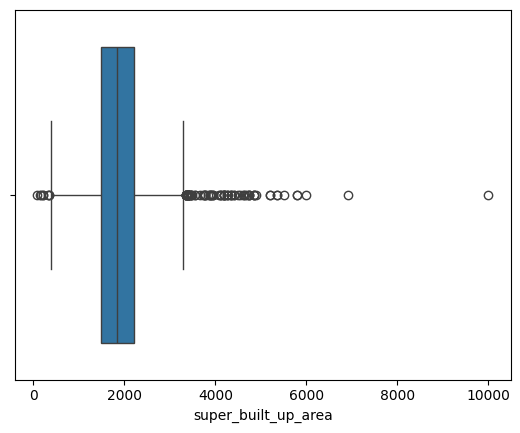

In [241]:
sns.boxplot(x=df['super_built_up_area'])

In [242]:
df['super_built_up_area'].describe()

count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [243]:
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1622,flats,krrish provence estate,gwal pahari,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5,6,3+,23.0,North-East,Relatively New,10000.0,NaN,NaN,0,1,0,1,1,0,49
2316,flats,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4,4,3+,19.0,North,Relatively New,6926.0,NaN,NaN,0,1,0,0,0,2,140


# built up area

/var/folders/kw/6wv56dfd1g90mmjkfvrm90ww0000gn/T/ipykernel_28736/3494228458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])


<Axes: xlabel='built_up_area', ylabel='Density'>

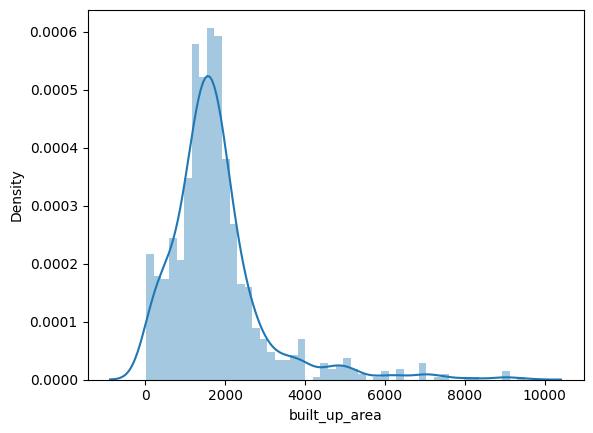

In [244]:
sns.distplot(df['built_up_area'])

<Axes: xlabel='built_up_area'>

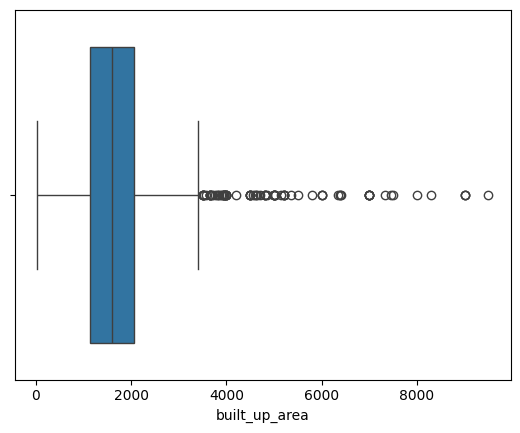

In [245]:
sns.boxplot(x=df['built_up_area'])

In [246]:
df[df['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score


# carpet area

/var/folders/kw/6wv56dfd1g90mmjkfvrm90ww0000gn/T/ipykernel_28736/3905767603.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])


<Axes: xlabel='carpet_area', ylabel='Density'>

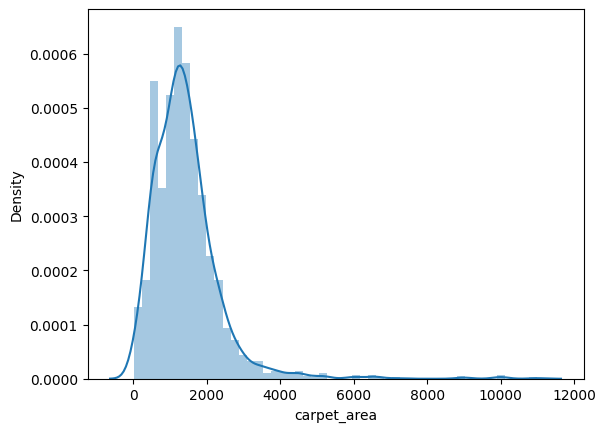

In [247]:
sns.distplot(df['carpet_area'])

<Axes: xlabel='carpet_area'>

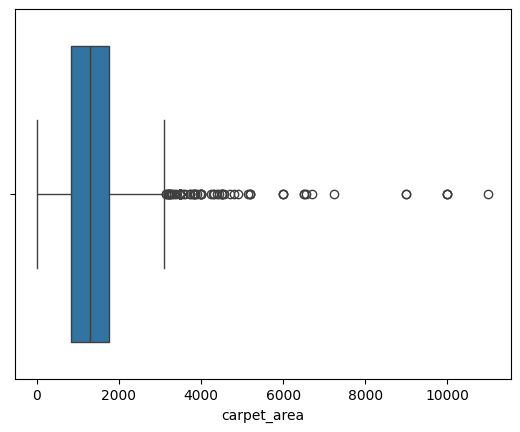

In [248]:
sns.boxplot(x=df['carpet_area'])

In [249]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2327,house,independent,sector 26,18.4,1859.0,4518.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.0,0,1,1,1,0,2,60


In [250]:
df.loc[2131,'carpet_area'] = 1812

In [251]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2327,house,independent,sector 26,18.4,1859.0,4518.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,4.0,South,Relatively New,NaN,NaN,11000.0,0.0,1.0,1.0,1.0,0.0,2.0,60.0


In [252]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,international city by sobha phase 2,sector 109,8.75,24306.0,3600.0,Plot area 400(334.45 sq.m.),5.0,5.0,3+,3.0,North-East,New Property,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,2.0,153.0
1,house,eldeco mansionz,sector 48,6.40,23704.0,2700.0,Plot area 365(305.19 sq.m.)Built Up area: 366 ...,4.0,4.0,3,3.0,West,Moderately Old,NaN,366.00,NaN,0.0,1.0,1.0,0.0,0.0,2.0,151.0
2,flats,bestech park view city,sector 49,2.90,12169.0,2383.0,Super Built up area 2383(221.39 sq.m.),4.0,4.0,3+,5.0,South-West,Moderately Old,2383.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,117.0
3,flats,denso haryana housing society,manesar,0.90,4308.0,2089.0,Carpet area: 2089 (194.07 sq.m.),3.0,3.0,3+,5.0,East,Moderately Old,NaN,NaN,2089.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0
4,flats,experion windchants,sector 112,3.40,12134.0,2802.0,Super Built up area 2802(260.31 sq.m.)Built Up...,3.0,3.0,2,14.0,North-East,Relatively New,2802.0,2225.56,NaN,0.0,0.0,0.0,0.0,0.0,2.0,159.0


/var/folders/kw/6wv56dfd1g90mmjkfvrm90ww0000gn/T/ipykernel_28736/3385064764.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['luxury_score'])


<Axes: xlabel='luxury_score', ylabel='Density'>

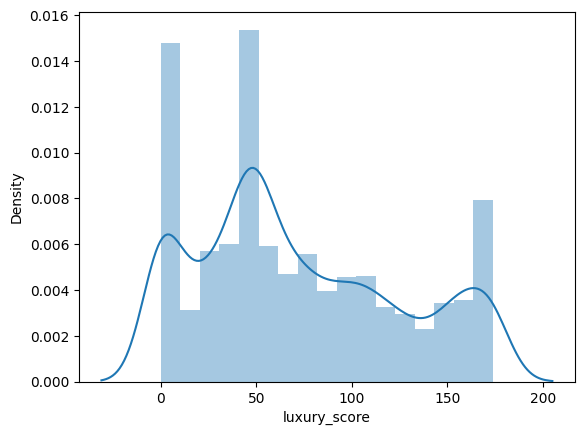

In [253]:
sns.distplot(df['luxury_score'])

<Axes: ylabel='luxury_score'>

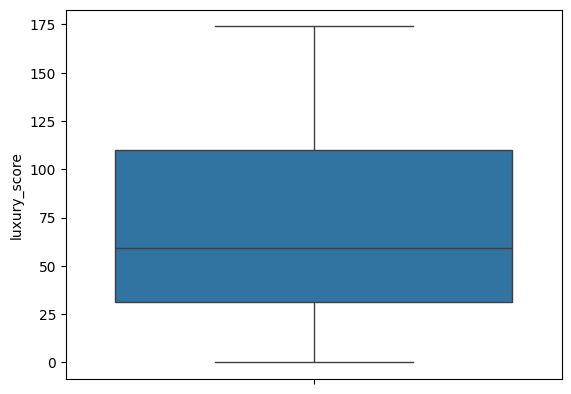

In [254]:
sns.boxplot(df['luxury_score'])

In [255]:
df.shape

(3586, 23)

In [256]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

In [257]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,international city by sobha phase 2,sector 109,8.75,24306.0,3600.0,Plot area 400(334.45 sq.m.),5.0,5.0,3+,3.0,North-East,New Property,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,2.0,153.0
1,house,eldeco mansionz,sector 48,6.40,23704.0,2700.0,Plot area 365(305.19 sq.m.)Built Up area: 366 ...,4.0,4.0,3,3.0,West,Moderately Old,NaN,366.00,NaN,0.0,1.0,1.0,0.0,0.0,2.0,151.0
2,flats,bestech park view city,sector 49,2.90,12170.0,2383.0,Super Built up area 2383(221.39 sq.m.),4.0,4.0,3+,5.0,South-West,Moderately Old,2383.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,117.0
3,flats,denso haryana housing society,manesar,0.90,4308.0,2089.0,Carpet area: 2089 (194.07 sq.m.),3.0,3.0,3+,5.0,East,Moderately Old,NaN,NaN,2089.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0
4,flats,experion windchants,sector 112,3.40,12134.0,2802.0,Super Built up area 2802(260.31 sq.m.)Built Up...,3.0,3.0,2,14.0,North-East,Relatively New,2802.0,2225.56,NaN,0.0,0.0,0.0,0.0,0.0,2.0,159.0


/var/folders/kw/6wv56dfd1g90mmjkfvrm90ww0000gn/T/ipykernel_28736/2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

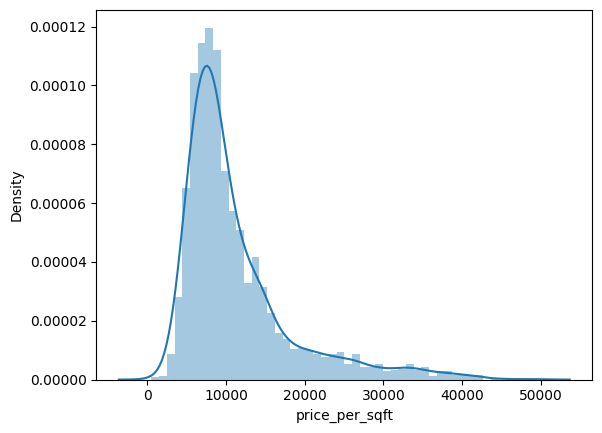

In [258]:
sns.distplot(df['price_per_sqft'])

<Axes: ylabel='price_per_sqft'>

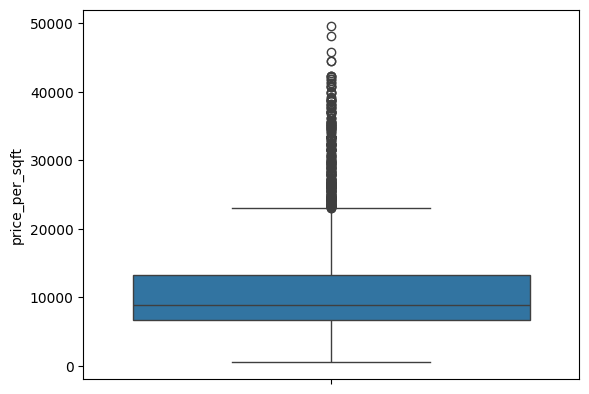

In [259]:
sns.boxplot(df['price_per_sqft'])

In [260]:
df[df['price_per_sqft'] > 42000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
503,house,independent,sector 55,5.0,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9.0,9.0,3+,5.0,East,New Property,NaN,115.0,100.0,0.0,0.0,0.0,0.0,1.0,2.0,44.0
585,house,independent,sector 26,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5.0,7.0,3+,3.0,West,Relatively New,NaN,NaN,NaN,0.0,1.0,0.0,1.0,0.0,1.0,97.0
1427,house,independent,sector 105,9.9,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2.0,2.0,2,3.0,North,Undefined,NaN,2000.0,1800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1668,house,sushant lok 1 builder floors,sector 43,13.0,48148.0,2700.0,Plot area 300(250.84 sq.m.),3.0,3.0,3+,4.0,North,New Property,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,2.0,7.0
1848,house,dlf city plots,sector 26,19.0,42054.0,4518.0,Plot area 502(419.74 sq.m.),6.0,6.0,3,2.0,East,Relatively New,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,2.0,121.0
2050,house,independent,sector 26,19.0,42222.0,4500.0,Plot area 500(418.06 sq.m.),6.0,8.0,3+,3.0,East,Moderately Old,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,2.0,103.0
2936,house,independent,sector 25,13.0,45710.0,2844.0,Plot area 316(264.22 sq.m.),6.0,8.0,3+,NaN,NaN,Relatively New,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,1.0,0.0
3473,house,independent,sector 43,9.5,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5.0,5.0,3+,2.0,North-East,Relatively New,NaN,300.0,250.0,0.0,1.0,0.0,1.0,0.0,2.0,88.0
3513,house,independent,sector 28,12.0,42194.0,2844.0,Plot area 316(264.22 sq.m.),4.0,5.0,3+,4.0,East,Relatively New,NaN,NaN,NaN,0.0,1.0,1.0,1.0,0.0,2.0,60.0


In [271]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.05)

250.5

In [272]:
df[(df['area']/df['bedRoom'])<250]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
29,house,independent,sector 24,3.50,32407.0,1080.0,Plot area 120(100.34 sq.m.),5.0,4.0,3,3.0,North-West,Old Property,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,15.0
72,house,independent,sector 12,1.35,12217.0,1105.0,Plot area 150(125.42 sq.m.)Built Up area: 2052...,5.0,5.0,1,3.0,NaN,Old Property,NaN,2052.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,31.0
81,house,dlf city plots phase 2,sector 25,6.50,33592.0,1935.0,Plot area 215(179.77 sq.m.),9.0,9.0,3+,3.0,West,Old Property,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,2.0,142.0
83,house,independent,sector 33 road,1.20,22305.0,538.0,Plot area 50,4.0,4.0,3+,4.0,West,Old Property,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,8.0
118,house,independent,sector 4,0.47,10609.0,443.0,Plot area 49(40.97 sq.m.)Built Up area: 50 sq....,2.0,2.0,1,2.0,East,New Property,NaN,50.0,48.000000,1.0,0.0,0.0,0.0,0.0,2.0,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3719,flats,mvn athens,sector 33,0.25,5187.0,482.0,Carpet area: 481.73 (44.75 sq.m.),2.0,2.0,1,3.0,East,Relatively New,NaN,NaN,481.684525,0.0,0.0,0.0,0.0,0.0,0.0,51.0
3744,house,rattan vihar rajendra park,dwarka expressway,0.85,14167.0,600.0,Plot area 600(55.74 sq.m.),5.0,5.0,3+,4.0,NaN,New Property,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3751,house,independent,sector 3 phase 3 extension,0.50,11111.0,450.0,Plot area 450(41.81 sq.m.),5.0,3.0,3,3.0,NaN,Moderately Old,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3760,house,independent,sector 7,0.90,10000.0,900.0,Plot area 100(83.61 sq.m.),6.0,4.0,3,3.0,North-East,Old Property,NaN,NaN,NaN,0.0,1.0,0.0,0.0,1.0,2.0,44.0


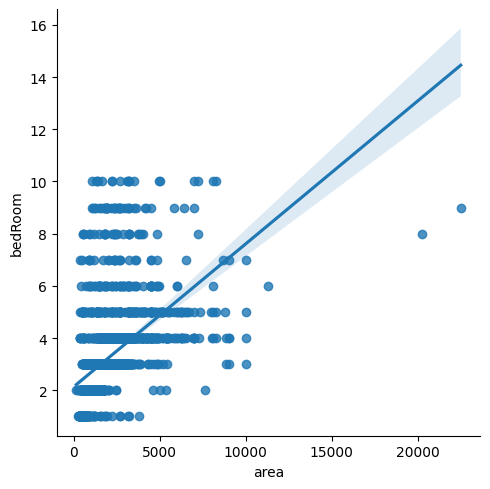

In [273]:
sns.lmplot(data=df, x='area', y='bedRoom')

In [275]:
df['area_room_ratio'] = df['area']/df['bedRoom']

In [276]:
(df[df['area_room_ratio']<250])['bedRoom'].value_counts()

bedRoom
2.0     47
3.0     33
5.0     28
4.0     17
6.0     17
9.0     16
8.0     12
7.0      8
10.0     7
Name: count, dtype: int64

In [277]:
df = df[df['area_room_ratio']>100]

In [278]:
outlier_df = df[(df['area_room_ratio']<250)&(df['bedRoom']>3)]

In [279]:
outlier_df['bedRoom']=round(outlier_df['bedRoom']/outlier_df['floorNum'])

/var/folders/kw/6wv56dfd1g90mmjkfvrm90ww0000gn/T/ipykernel_28736/3823887811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_df['bedRoom']=round(outlier_df['bedRoom']/outlier_df['floorNum'])


In [280]:
df.update(outlier_df)

In [281]:
df['area_room_ratio']=df['area']/df['bedRoom']

In [282]:
df[(df['area_room_ratio']<250)&(df['bedRoom']>4)]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
1018,house,independent,sector 2,0.98,9074.0,1080.0,Carpet area: 120 (100.34 sq.m.),9.0,4.0,3,1.0,South,Undefined,NaN,NaN,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.000000
1226,house,independent,sector 3 phase 2,1.10,10000.0,1100.0,Built Up area: 1100 (102.19 sq.m.)Carpet area:...,5.0,4.0,2,1.0,East,Undefined,NaN,1100.0,900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,220.000000
1237,house,independent,sector 11,3.50,15556.0,2250.0,Built Up area: 2250 (209.03 sq.m.),10.0,1.0,0,1.0,NaN,New Property,NaN,2250.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,225.000000
1735,house,independent,sector 12,0.65,6500.0,1000.0,Carpet area: 1000 (92.9 sq.m.),6.0,2.0,3,1.0,NaN,Undefined,NaN,NaN,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,166.666667
1749,house,independent,sector 7,1.16,11717.0,990.0,Carpet area: 110 (91.97 sq.m.),5.0,4.0,2,1.0,North-East,Undefined,NaN,NaN,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,198.000000
2014,house,independent,sector 17,0.32,5664.0,565.0,Built Up area: 565 (52.49 sq.m.),5.0,1.0,0,1.0,NaN,Undefined,NaN,565.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,113.000000
2271,house,independent,sector 3 phase 2,0.85,9444.0,900.0,Carpet area: 900 (83.61 sq.m.),5.0,3.0,3,1.0,NaN,Undefined,NaN,NaN,900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.000000
2279,house,independent,manesar,0.80,6667.0,1200.0,Plot area 1200(111.48 sq.m.),8.0,8.0,2,1.0,NaN,Relatively New,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.000000
2489,house,independent,manesar,1.10,6173.0,1782.0,Plot area 1782(165.55 sq.m.),8.0,8.0,0,1.0,NaN,New Property,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,222.750000
2828,house,independent,sector 12,2.50,13889.0,1800.0,Plot area 1800(167.23 sq.m.),9.0,5.0,2,1.0,South-East,Old Property,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,8.0,200.000000


In [283]:
df[(df['area_room_ratio']<250)&(df['bedRoom']>4)].shape

(13, 24)

In [284]:
df.shape

(3565, 24)

In [285]:
df=df[~((df['area_room_ratio']<250)&(df['bedRoom']>4))]

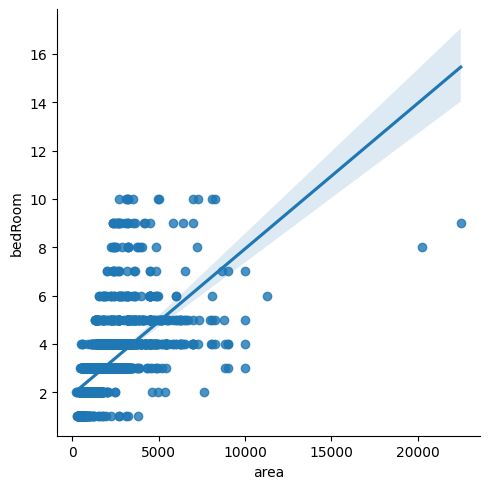

In [288]:
sns.lmplot(data=df, x='area', y='bedRoom')

In [289]:
df.to_csv('gurgaon_properties_outlier_treated.csv', index=False)